# Dataset #2 Preprocessing and Exploration

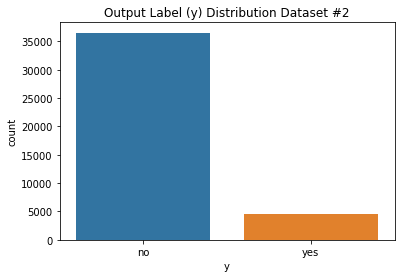

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import seaborn as sns

ds1 = pd.read_csv('./data/bank-additional-full.csv', delimiter=';')
ds1.dropna()
ds1.drop_duplicates()
ax2 = sns.countplot(x="y", data=ds1).set_title("Output Label (y) Distribution Dataset #2")

Text(0.5, 1.0, 'Correlation Matrix')

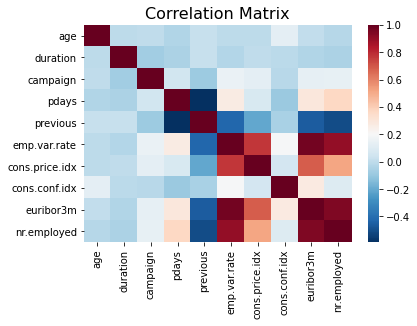

In [2]:
sns.heatmap(ds1.select_dtypes(exclude="object").corr(), cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)

In [3]:
ds1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
ds1_dummies = pd.get_dummies(ds1, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
ds1_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'mon

In [5]:
ds1_dummies.dropna()
ds1_dummies['y'].value_counts()
ds1_dummies['y'] = ds1_dummies['y'].map({'yes':1, 'no': 0})
ds1_labels = ds1_dummies['y']
ds1_dummies = ds1_dummies.drop(['y'], axis=1)
ds1_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds1_dummies, ds1_labels, test_size=0.20, stratify=ds1_labels)

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  32950
number of test samples:  8238


In [7]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
pipe_steps = [('scaler', StandardScaler()), ('boost', AdaBoostClassifier(random_state=0))]

check_params = {'boost__base_estimator':[DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)], 
                'boost__n_estimators': [10, 20, 30, 40, 50, 60],
                'boost__learning_rate': [0.1, 0.5, 1.0],
                'boost__algorithm': ['SAMME', 'SAMME.R']}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('boost', AdaBoostClassifier(random_state=0))])


In [8]:
from tqdm import tqdm_notebook as tqdm
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm(range(3, 10)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv, n_jobs=6)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %5.4f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)
    

print ("out o' the loop")


start fitting the data


score for 3 fold CV := 0.9122
!!!! best fit parameters from GridSearchCV !!!!
{'boost__algorithm': 'SAMME.R', 'boost__base_estimator': DecisionTreeClassifier(max_depth=3), 'boost__learning_rate': 0.5, 'boost__n_estimators': 30}
score for 4 fold CV := 0.9125
!!!! best fit parameters from GridSearchCV !!!!
{'boost__algorithm': 'SAMME.R', 'boost__base_estimator': DecisionTreeClassifier(max_depth=3), 'boost__learning_rate': 0.5, 'boost__n_estimators': 20}
score for 5 fold CV := 0.9122
!!!! best fit parameters from GridSearchCV !!!!
{'boost__algorithm': 'SAMME.R', 'boost__base_estimator': DecisionTreeClassifier(max_depth=3), 'boost__learning_rate': 0.5, 'boost__n_estimators': 30}
score for 6 fold CV := 0.9109
!!!! best fit parameters from GridSearchCV !!!!
{'boost__algorithm': 'SAMME.R', 'boost__base_estimator': DecisionTreeClassifier(max_depth=2), 'boost__learning_rate': 0.5, 'boost__n_estimators': 50}
score for 7 fold CV := 0.9125
!!!! best fit parameters from GridSearchCV !!!!
{'boost__a

In [18]:
%%time
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

DecsTree = AdaBoostClassifier(random_state=0, algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=40)
DecsTree.fit(X_train, y_train)


y_pred_train = DecsTree.predict(X_train)
y_pred_test = DecsTree.predict(X_test)
conf_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print('training data confusion matrix')
print(conf_matrix_train)
print('testing data confusion matrix')
print(conf_matrix_test)

print('training error rate: {}'.format(1 - accuracy_score(y_train, y_pred_train)))
print('test error rate: {}'.format(1 - accuracy_score(y_test, y_pred_test)))

print('training F1 Score: {}'.format(1 - f1_score(y_train, y_pred_train)))
print('test F1 score: {}'.format(1 - f1_score(y_test, y_pred_test)))

training data confusion matrix
      0      1
0  3999   2007
1   991  17132
testing data confusion matrix
     0     1
0  969   533
1  247  4284
training error rate: 0.12424882920966474
test error rate: 0.12928891098955742
training F1 Score: 0.08045730234555315
test F1 score: 0.08344030808729141
CPU times: user 2.09 s, sys: 14.9 ms, total: 2.11 s
Wall time: 2.11 s


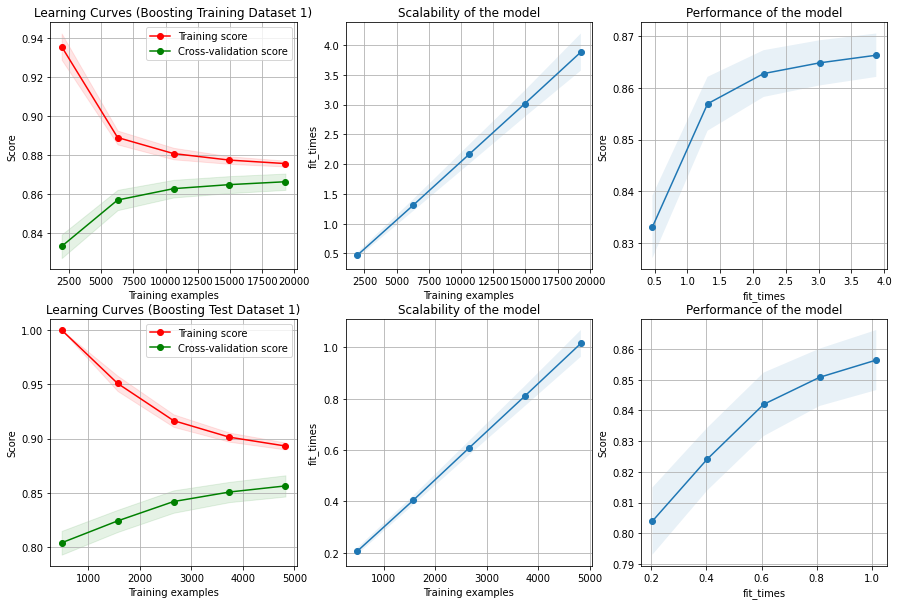

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(2,3, figsize=(15, 10))

title = "Learning Curves (Boosting Training Dataset 1)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = AdaBoostClassifier(random_state=0, algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=40)

plot_learning_curve(estimator, title, X_train, y_train,cv=cv, n_jobs=-1, axes=axes[0, :])
title = "Learning Curves (Boosting Test Dataset 1)"

plot_learning_curve(estimator, title, X_test, y_test,cv=cv, n_jobs=-1, axes=axes[1, :])



plt.show()

